In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# Dataframe from CSV
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
df.head ()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# Numbers of rows and columns
df.shape

(9134, 24)

In [7]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
# Rename columns
df = df.rename(columns=lambda x: x.upper().replace(' ', '_'))

5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.

In [9]:
df.STATE.unique ()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [10]:
df['EFFECTIVE_TO_DATE'] = df['EFFECTIVE_TO_DATE'].apply(lambda x: datetime.strptime(x, "%m/%d/%y").strftime("%m/%Y"))

# EDA

In [11]:
df_num = df.select_dtypes (include='number')

In [12]:
# Checking how many unique values each variable has.

for columna in df_num.columns:
    print ('Number of unique values from', columna,': ',df_num[columna].nunique ())

Number of unique values from CUSTOMER_LIFETIME_VALUE :  8041
Number of unique values from INCOME :  5694
Number of unique values from MONTHLY_PREMIUM_AUTO :  202
Number of unique values from MONTHS_SINCE_LAST_CLAIM :  36
Number of unique values from MONTHS_SINCE_POLICY_INCEPTION :  100
Number of unique values from NUMBER_OF_OPEN_COMPLAINTS :  6
Number of unique values from NUMBER_OF_POLICIES :  9
Number of unique values from TOTAL_CLAIM_AMOUNT :  5106


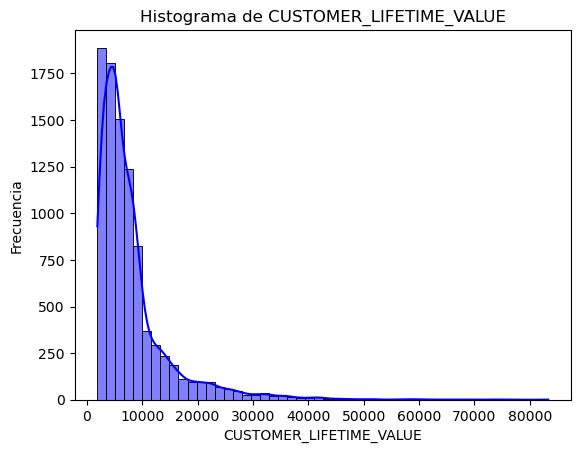

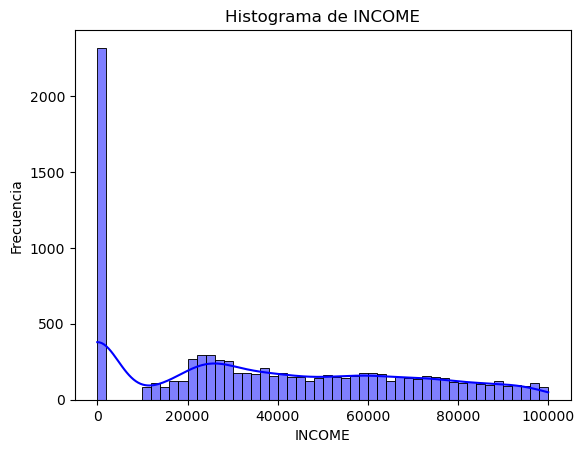

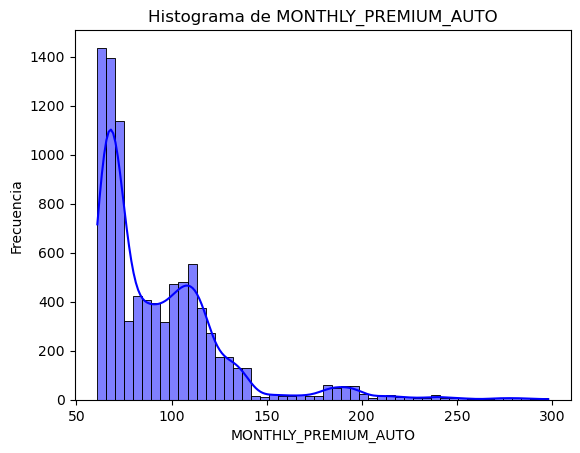

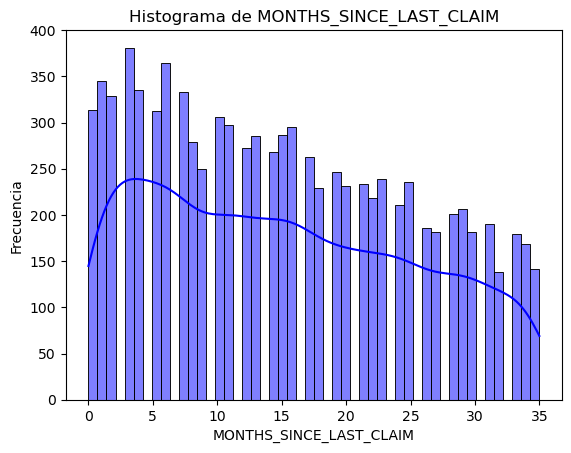

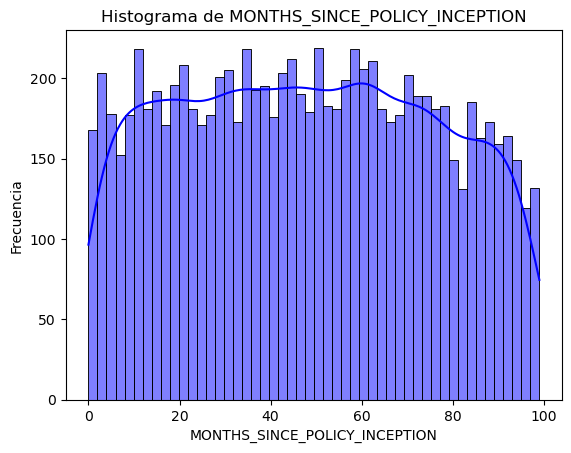

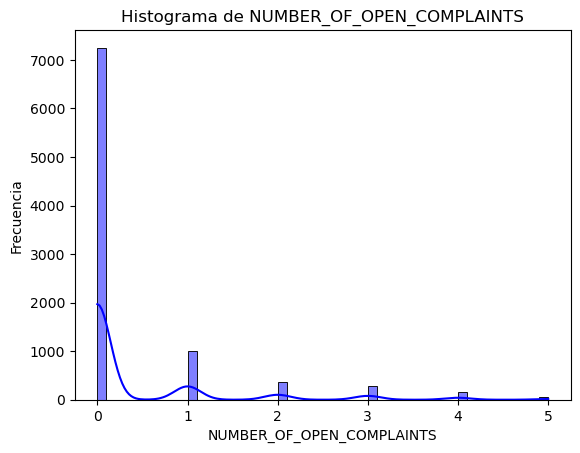

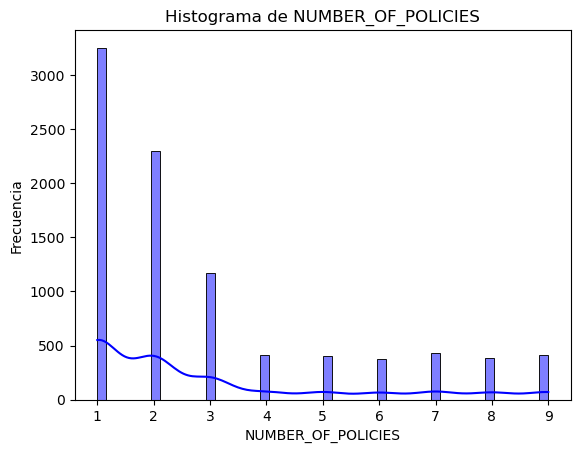

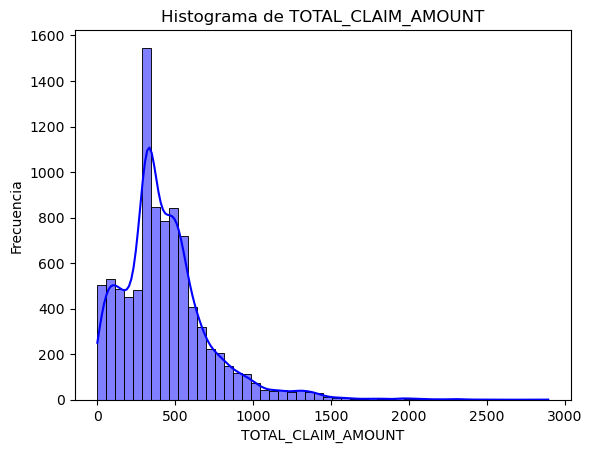

In [13]:
for columna in df_num.columns:
    plt.figure()  # Crea una nueva figura para cada gráfico
    sns.histplot(df[columna], bins = 50, kde = True, color = 'blue')  # Crea un histograma para la columna
    
    # Agrega títulos y etiquetas a los ejes
    plt.title("Histograma de " + columna)
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    plt.show()  # Muestra el gráfico

The variable 'Number of open complaints' refers to a non-zero number, so it cannot be equal to 0.

In [14]:
for i in range (6):
    print (i, ' complaints: ', df_num ['NUMBER_OF_OPEN_COMPLAINTS'].value_counts().get(i, 0))
    print ()

0  complaints:  7252

1  complaints:  1011

2  complaints:  374

3  complaints:  292

4  complaints:  149

5  complaints:  56



In [15]:
df_cat = df.select_dtypes (include = object)
df_cat

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,02/2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,01/2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,02/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,01/2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,02/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,02/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,02/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,02/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,02/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [16]:
df_cat.columns

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [17]:
for columna in df_cat.columns:
    # Obtener los valores únicos de la columna actual
    unique_values = df_cat[columna].unique()
    print (columna,': ', unique_values)

CUSTOMER :  ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
STATE :  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
RESPONSE :  ['No' 'Yes']
COVERAGE :  ['Basic' 'Extended' 'Premium']
EDUCATION :  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
EFFECTIVE_TO_DATE :  ['02/2011' '01/2011']
EMPLOYMENTSTATUS :  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
GENDER :  ['F' 'M']
LOCATION_CODE :  ['Suburban' 'Rural' 'Urban']
MARITAL_STATUS :  ['Married' 'Single' 'Divorced']
POLICY_TYPE :  ['Corporate Auto' 'Personal Auto' 'Special Auto']
POLICY :  ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
RENEW_OFFER_TYPE :  ['Offer1' 'Offer3' 'Offer2' 'Offer4']
SALES_CHANNEL :  ['Agent' 'Call Center' 'Web' 'Branch']
VEHICLE_CLASS :  ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
VEHICLE_SIZE :  ['Medsize' 'Small' 'Large']


6. Plot a correlation matrix, and comment on what you observe.

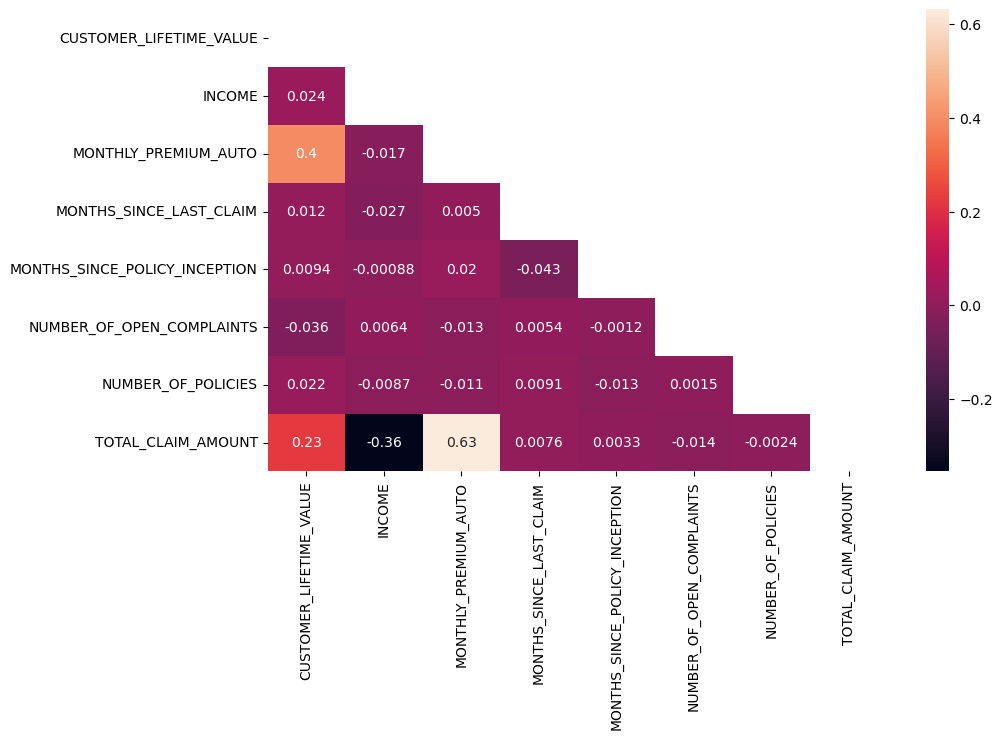

In [18]:
correlations_matrix = df_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot = True)
plt.show()

Tengo 3 pares de variables que están notablemente correlacionadas. Se trata de: 
Total Claim Amount - Customer Lifetime Value
Total Claim Amount - Monthly Premium Auto
Monthly Premium Auto - Customer Lifetime Value

7. Plot every continuous variable. Comment what you can see in the plots.

In [19]:
df_num.columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

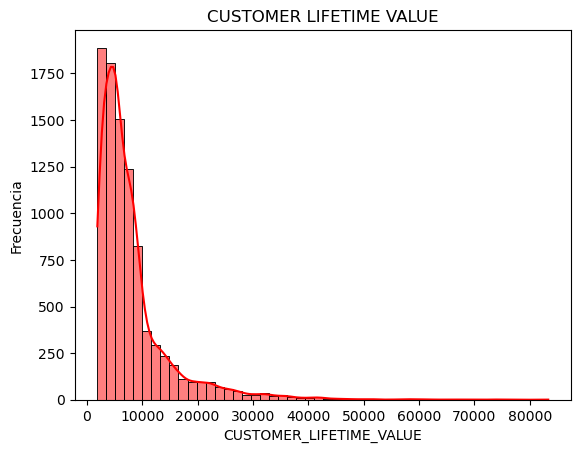

In [20]:
plt.figure()  # Crea una nueva figura para cada gráfico
sns.histplot(df_num['CUSTOMER_LIFETIME_VALUE'], bins = 50, kde = True, color = 'red')  # Crea un histograma para la columna
    
# Agrega títulos y etiquetas a los ejes
plt.title("CUSTOMER LIFETIME VALUE")
plt.ylabel("Frecuencia")
    
plt.show()  # Muestra el gráfico

En el gráfico de CUSTOMER_LIFETIME_VALUE se puede observar una asimetría positiva. Esto indica que muchos outliers tienen valores muy superiores a la media.

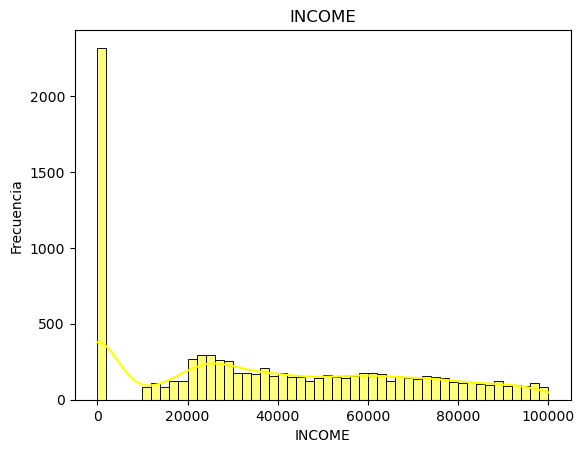

In [21]:
plt.figure()  # Crea una nueva figura para cada gráfico
sns.histplot(df_num['INCOME'], bins = 50, kde = True, color = 'yellow')  # Crea un histograma para la columna
    
# Agrega títulos y etiquetas a los ejes
plt.title("INCOME")
plt.ylabel("Frecuencia")
    
plt.show()  # Muestra el gráfico

In [22]:
# I will check how many values are equal to zero and how many are greater.
income_0 = df_num['INCOME'].value_counts().get(0, 0)
income_0

2317

In [23]:
# Values greater than 0
inc = df_num['INCOME'].count () - df_num['INCOME'].value_counts().get(0, 0)
inc

6817

In [24]:
# Percentage value for income  = 0
print ('Income equal to zero', round(income_0 * 100 / df_num['INCOME'].count (),2), '%')
print ('Income greater than zero', round(inc * 100 / df_num['INCOME'].count (),2), '%')

Income equal to zero 25.37 %
Income greater than zero 74.63 %


En el gráfico de INCOME se puede observar una concentración de resultados iguales a 0. Los resultados restantes, que representan en si a los INCOME de cada ID, parecieran tener una distribución normal.

Si desestimara los valores = 0, entonces la distribución sería esta:

In [25]:
df_num_over_0 = df_num.drop(df_num[df_num['INCOME'] == 0].index)

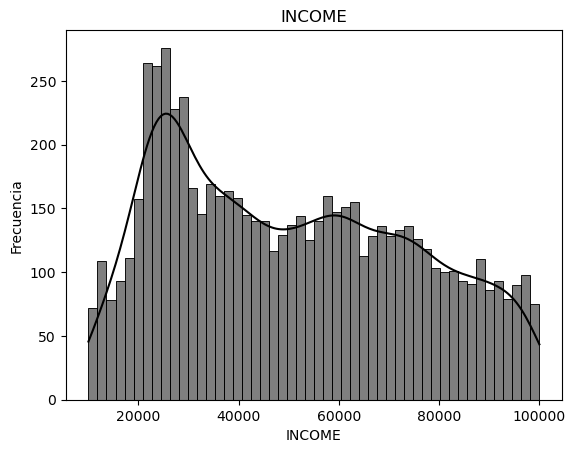

In [26]:
plt.figure()  # Crea una nueva figura para cada gráfico
sns.histplot(df_num_over_0['INCOME'], bins = 50, kde = True, color = 'black')  # Crea un histograma para la columna
    
# Agrega títulos y etiquetas a los ejes
plt.title("INCOME")
plt.ylabel("Frecuencia")
    
plt.show()  # Muestra el gráfico

In [27]:
df_num_over_0['INCOME'].describe ()

count     6817.000000
mean     50456.580461
std      24305.956566
min      10037.000000
25%      28432.000000
50%      48081.000000
75%      70187.000000
max      99981.000000
Name: INCOME, dtype: float64

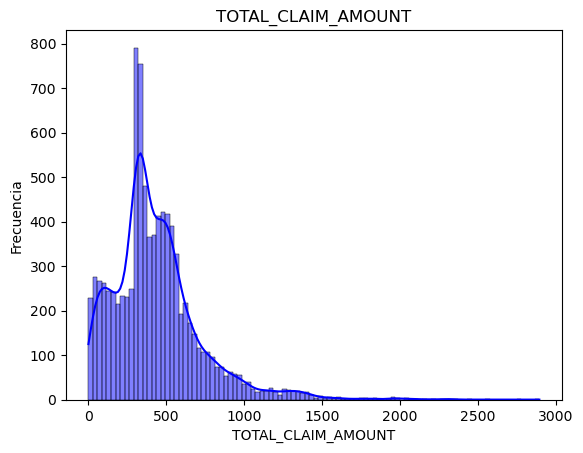

In [28]:
plt.figure()  # Crea una nueva figura para cada gráfico
sns.histplot(df_num['TOTAL_CLAIM_AMOUNT'], bins = 100, kde = True, color = 'blue')  # Crea un histograma para la columna
    
# Agrega títulos y etiquetas a los ejes
plt.title("TOTAL_CLAIM_AMOUNT")
plt.ylabel("Frecuencia")
    
plt.show()  # Muestra el gráfico

TOTAL_CLAIM_AMOUNT presenta una asimetría positiva. Mediana > Media

8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [29]:
# I will Delete the column CUSTOMER
df_cat.drop(columns = ['CUSTOMER'], inplace = True)

In [30]:
# Checking df_cat columns
df_cat.columns


Index(['STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE_TO_DATE',
       'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS',
       'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [31]:
df_cat.columns

Index(['STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE_TO_DATE',
       'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS',
       'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [32]:
df

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,02/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,01/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,02/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,01/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,02/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,02/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,02/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,02/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


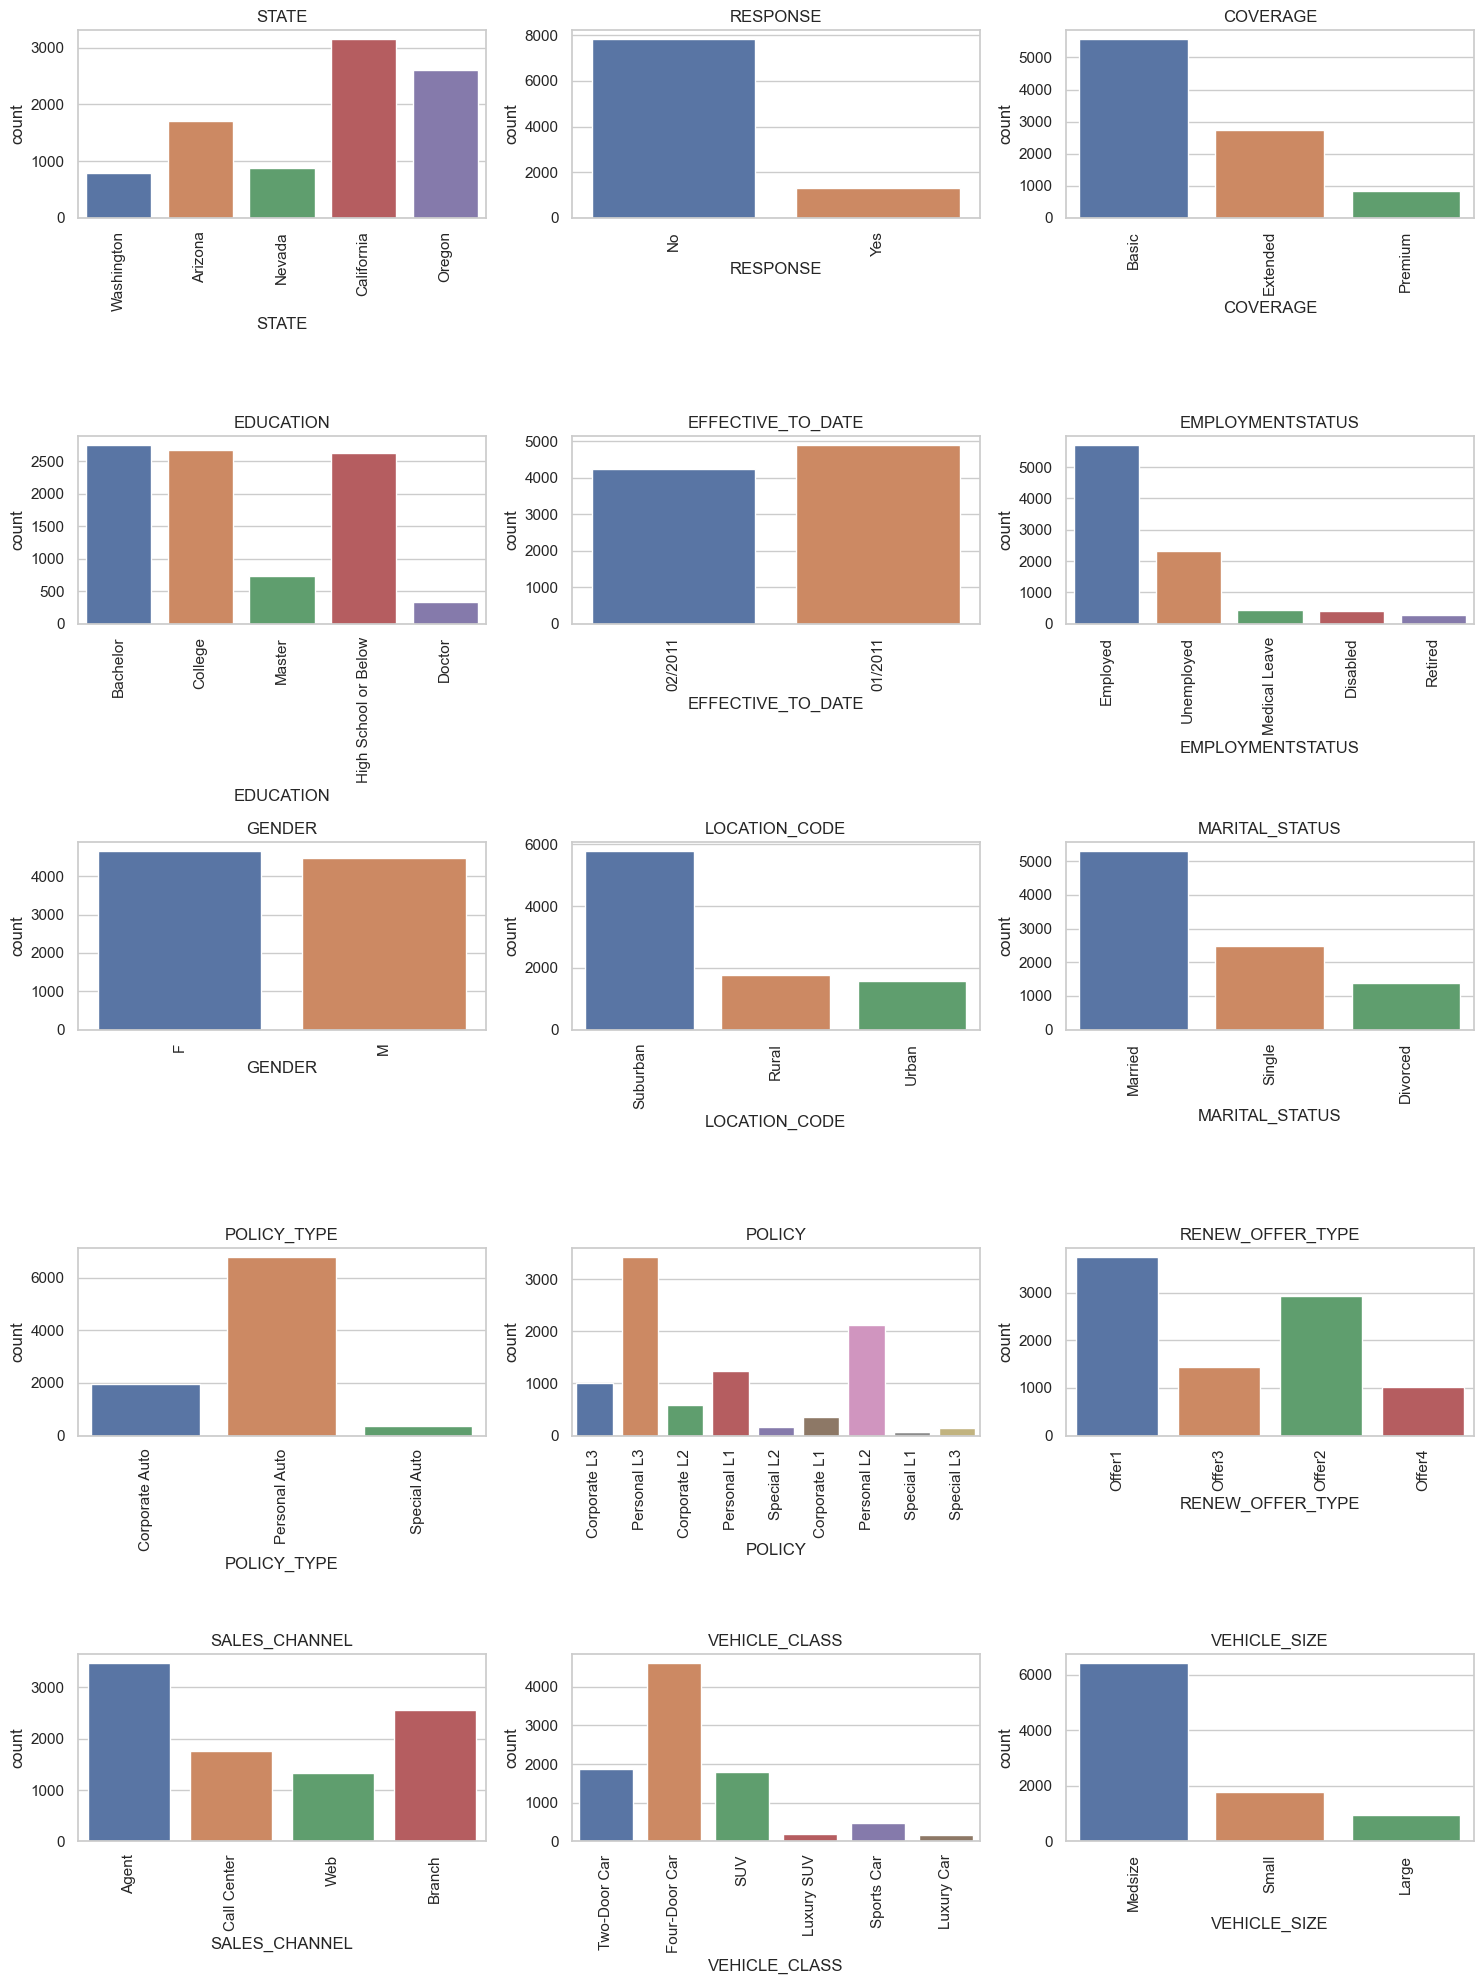

In [33]:
# Ploting categorical variables

import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_cat es tu DataFrame
sns.set(style="whitegrid")

columns = ['STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE_TO_DATE',
           'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS',
           'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL',
           'VEHICLE_CLASS', 'VEHICLE_SIZE']

num_rows = len(columns) // 3 + (len(columns) % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(data=df_cat, x=column, ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

In [34]:
# I will check the columns distribution
for column in df_cat:
    print (df_cat[column].value_counts())
    print ('___________________________')


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64
___________________________
No     7826
Yes    1308
Name: RESPONSE, dtype: int64
___________________________
Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64
___________________________
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64
___________________________
01/2011    4898
02/2011    4236
Name: EFFECTIVE_TO_DATE, dtype: int64
___________________________
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENTSTATUS, dtype: int64
___________________________
F    4658
M    4476
Name: GENDER, dtype: int64
___________________________
Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64
__________________________

9. Look for outliers in the continuous variables. (**Hint**: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

In [41]:
df_num.columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

In [48]:
columnas_deseadas = ['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
                     'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
                     'TOTAL_CLAIM_AMOUNT']

# Crear el DataFrame df_num_cont con las columnas deseadas
df_num_cont = df_num[columnas_deseadas]

In [49]:
df_num_cont.columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

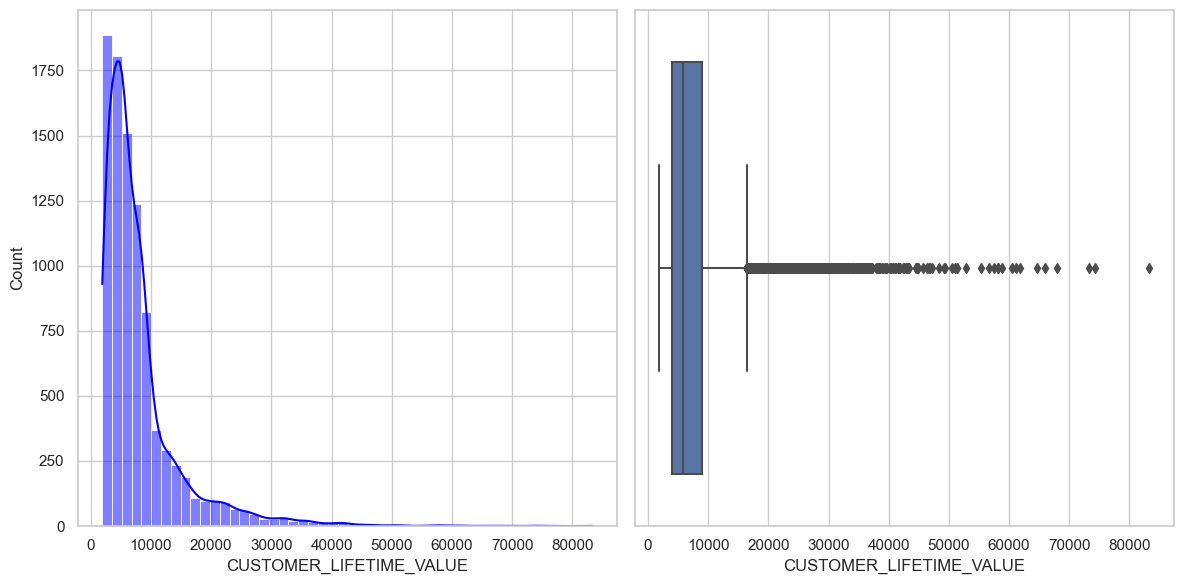

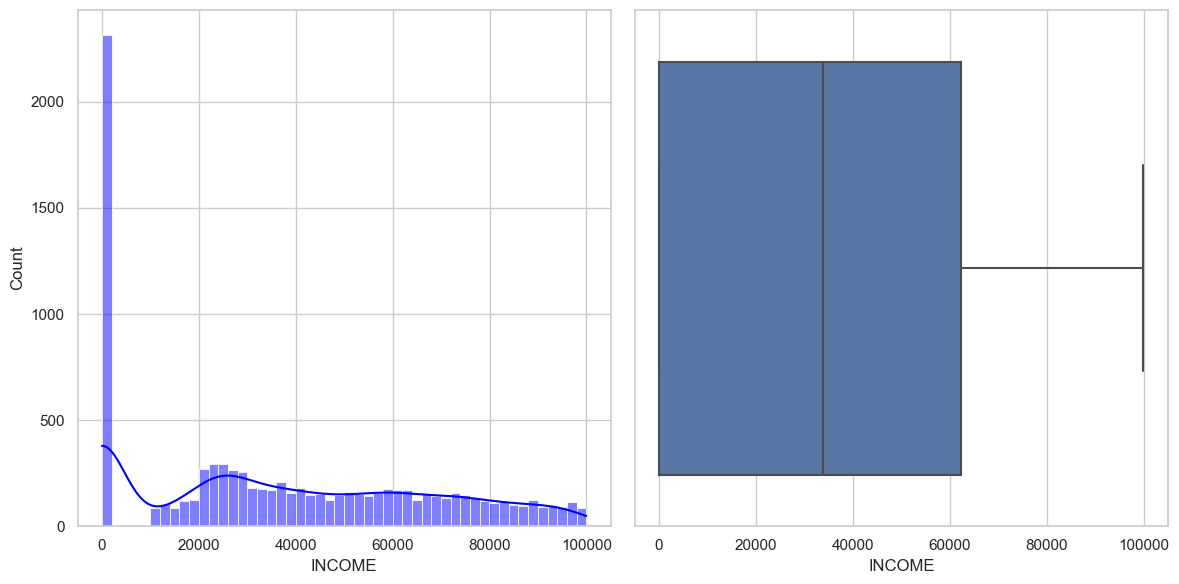

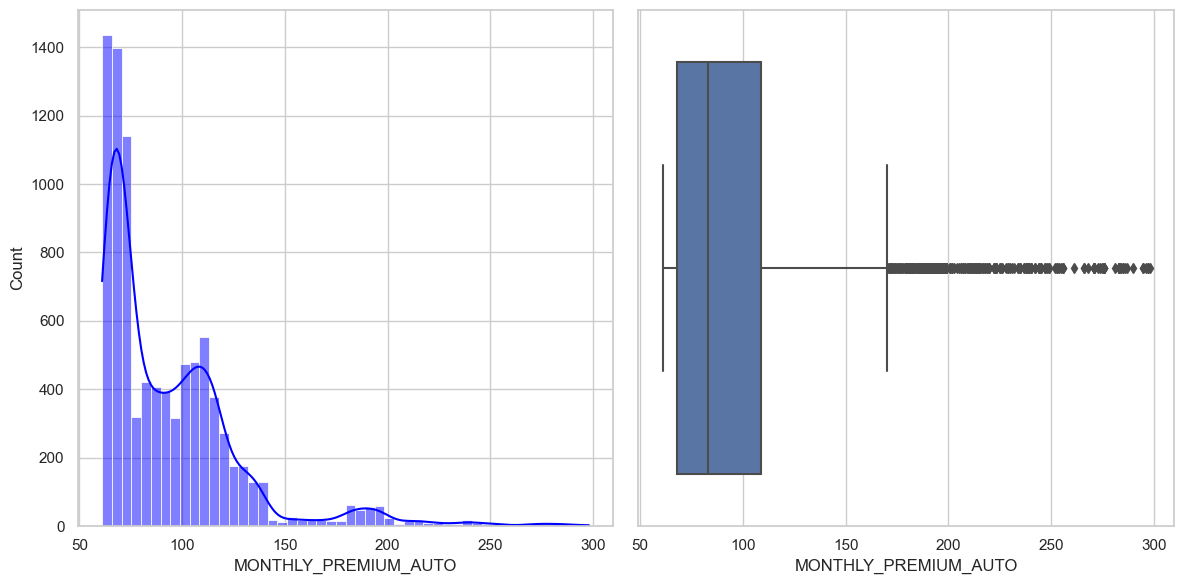

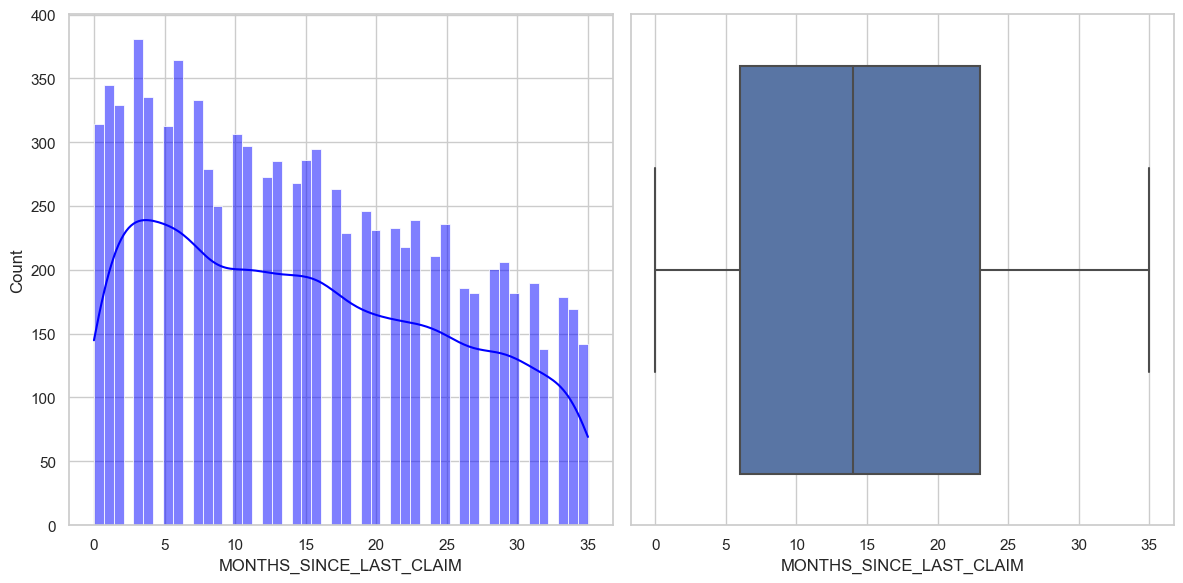

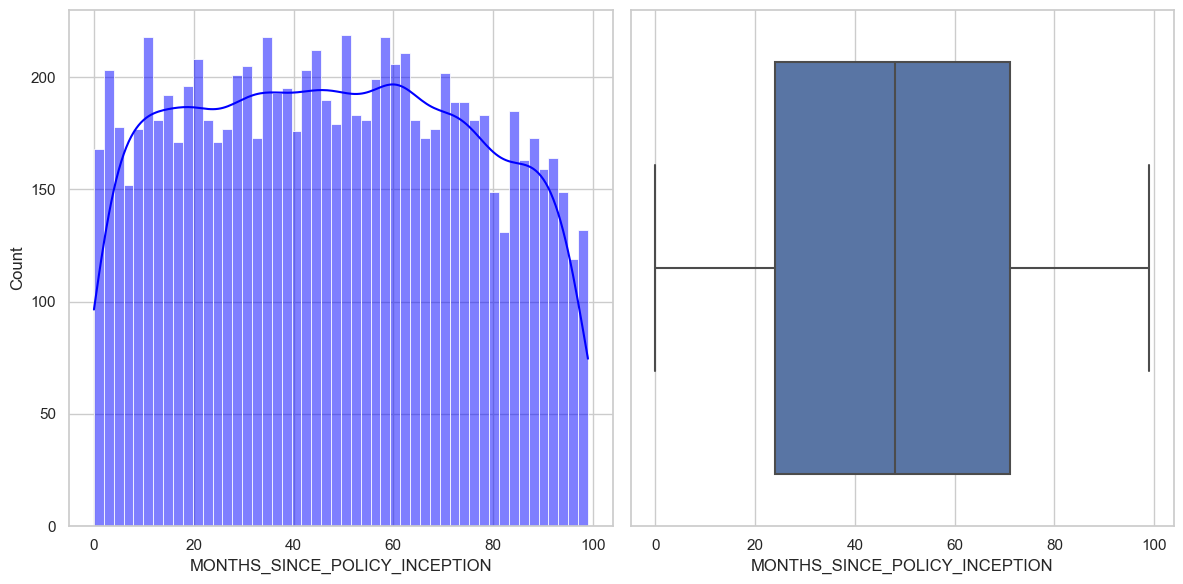

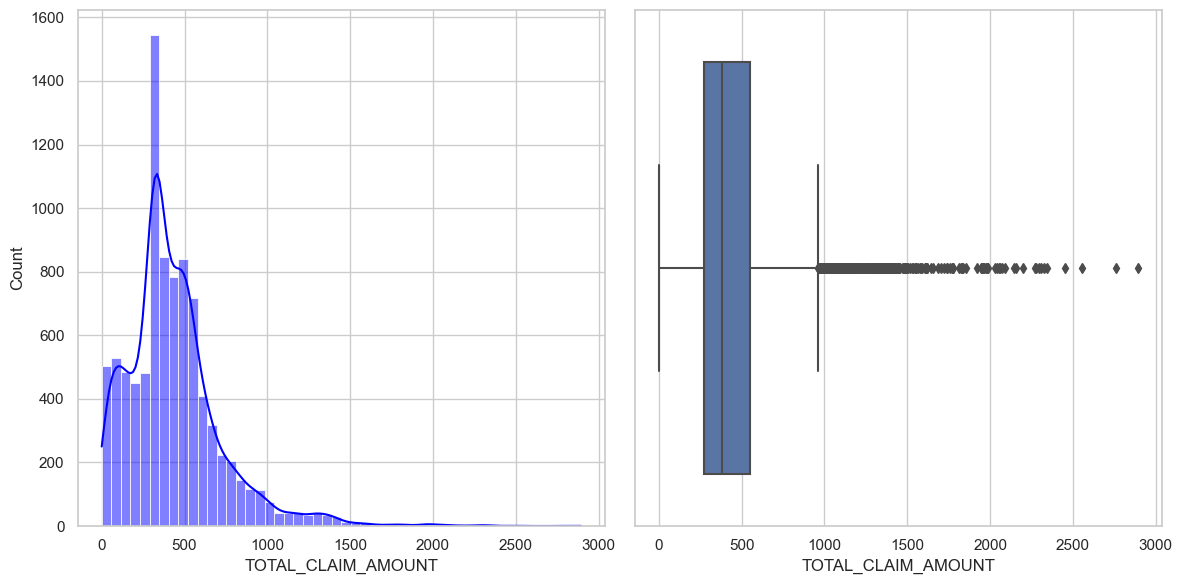

In [51]:
for columna in df_num_cont.columns:
    # Crea dos gráficos de Seaborn
    plt.figure(figsize=(12, 6))  # Tamaño de la figura
    
    # Primer gráfico
    plt.subplot(1, 2, 1)  
    sns.histplot(df_num_cont[columna], bins = 50, kde = True, color = 'blue')

    # Segundo gráfico
    plt.subplot(1, 2, 2)  
    sns.boxplot(x = df_num_cont[columna])

    plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
    plt.show()  # Muestra la figura

Analizaré los outliers de las columnas CUSTOMER_LIFETIME_VALUE, MONTHLY_PREMIUM_AUTO ,TOTAL_CLAIM_AMOUNT

In [52]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [56]:
def sqrt_transform_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

## Using the functions to check the distribution of transformed data

LOG TRANSFORMATION: CUSTOMER_LIFETIME_VALUE

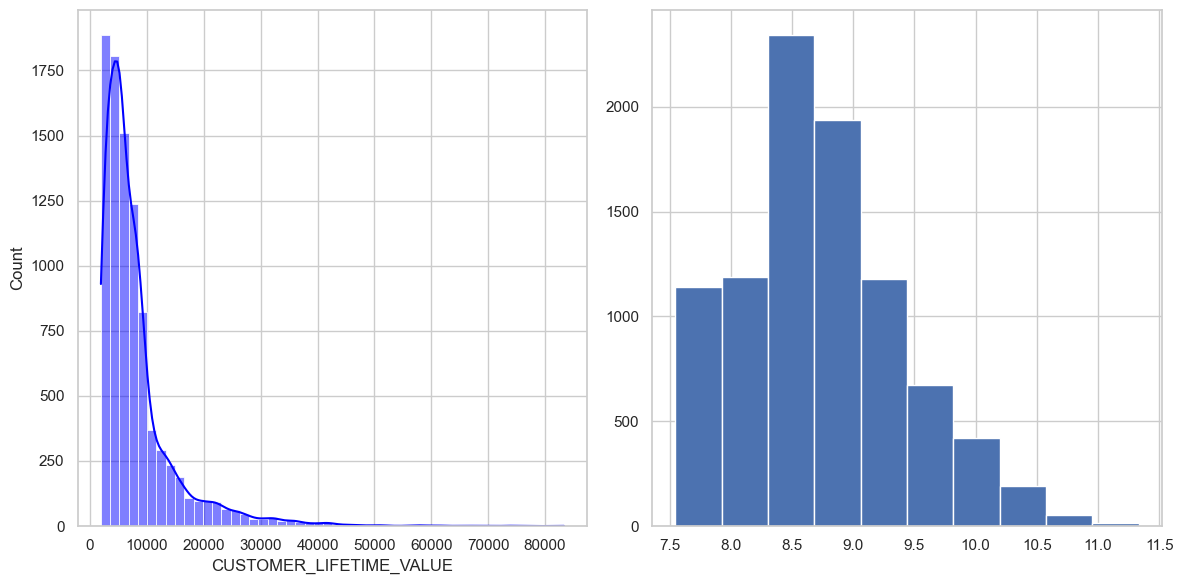

In [55]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num_cont['CUSTOMER_LIFETIME_VALUE'], bins = 50, kde = True, color = 'blue')

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(log_transfom_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

SQRT TRANSFORM: CUSTOMER_LIFETIME_VALUES

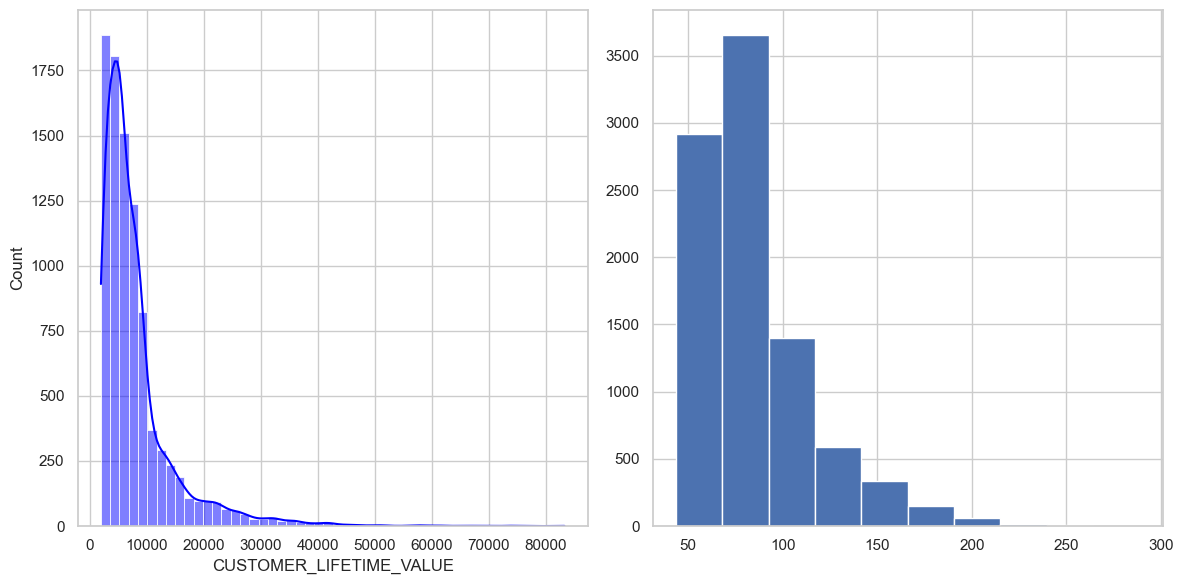

In [58]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num_cont['CUSTOMER_LIFETIME_VALUE'], bins = 50, kde = True, color = 'blue')

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(sqrt_transform_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

Comparo los dos métodos para visualizar la distribución de datos mas conveniente

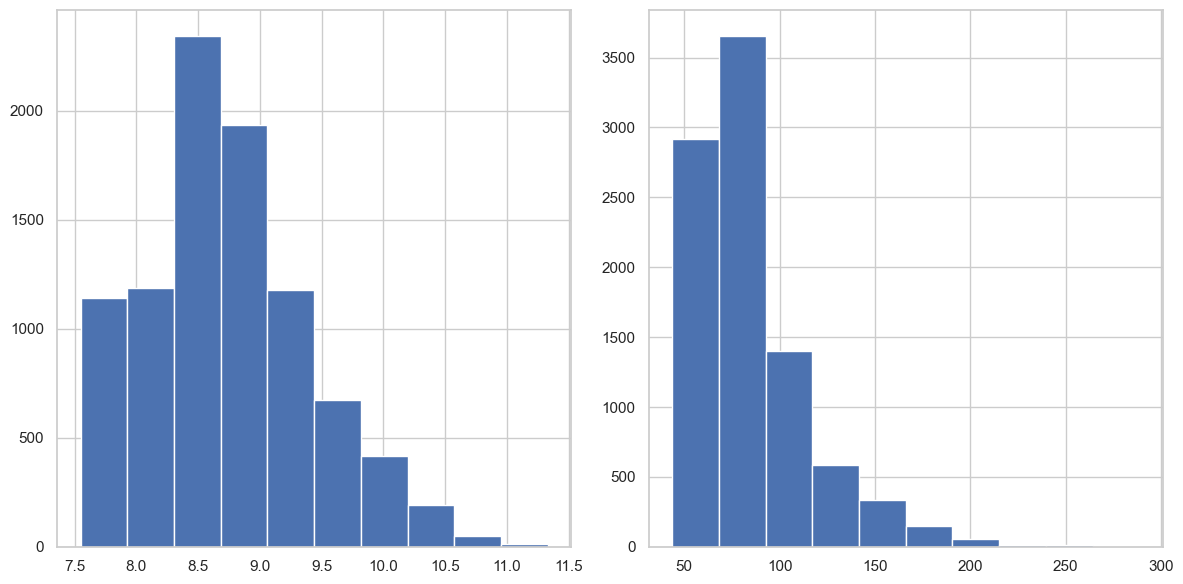

In [59]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Primer gráfico
plt.subplot(1, 2, 1)
pd.Series(map(log_transfom_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE'])).hist()

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(sqrt_transform_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

Elegiré LOG TRANSFORMATION

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_15585/2761481662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cont['CUSTOMER_LIFETIME_VALUE'] = list(map(log_transfom_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE']))
/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_15585/2761481662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cont['CUSTOMER_LIFETIME_VALUE'] = df_num_cont['CUSTOMER_LIFETIME_VALUE'].fillna(np.mean(df_num_cont['CUSTOMER_LIFETIME_VALUE']))
/var/fol

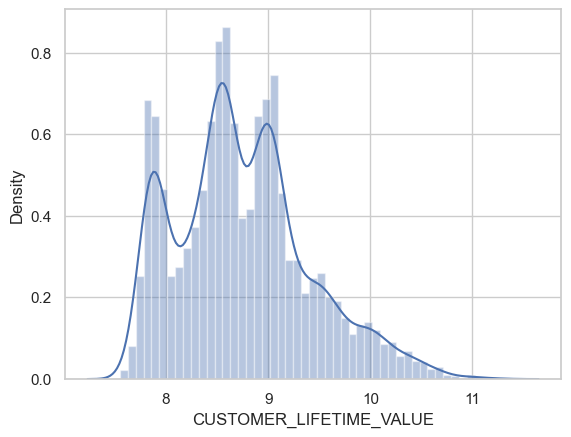

In [61]:
# Use log transformation to replace the values of the column now
df_num_cont['CUSTOMER_LIFETIME_VALUE'] = list(map(log_transfom_clean_, df_num_cont['CUSTOMER_LIFETIME_VALUE']))
df_num_cont['CUSTOMER_LIFETIME_VALUE'] = df_num_cont['CUSTOMER_LIFETIME_VALUE'].fillna(np.mean(df_num_cont['CUSTOMER_LIFETIME_VALUE']))
sns.distplot(df_num_cont['CUSTOMER_LIFETIME_VALUE'])
plt.show()

In [62]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_num_cont['CUSTOMER_LIFETIME_VALUE'],75) - np.percentile(df_num_cont['CUSTOMER_LIFETIME_VALUE'],25)
upper_limit = np.percentile(df_num_cont['CUSTOMER_LIFETIME_VALUE'],75) + 1.5*iqr
print(upper_limit)

10.313001003057334


In [64]:
df_num_cont_CLV = df_num_cont[df_num_cont['CUSTOMER_LIFETIME_VALUE'] > upper_limit]
len(df_num_cont_CLV)  # This checks the number of points that will be removed

185

In [65]:
# Using filters
points = list(filter(lambda x: x < upper_limit, df_num_cont['CUSTOMER_LIFETIME_VALUE']))
len(points)

8949

LOG TRANSFORMATION: MONTHLY_PREMIUM_AUTO

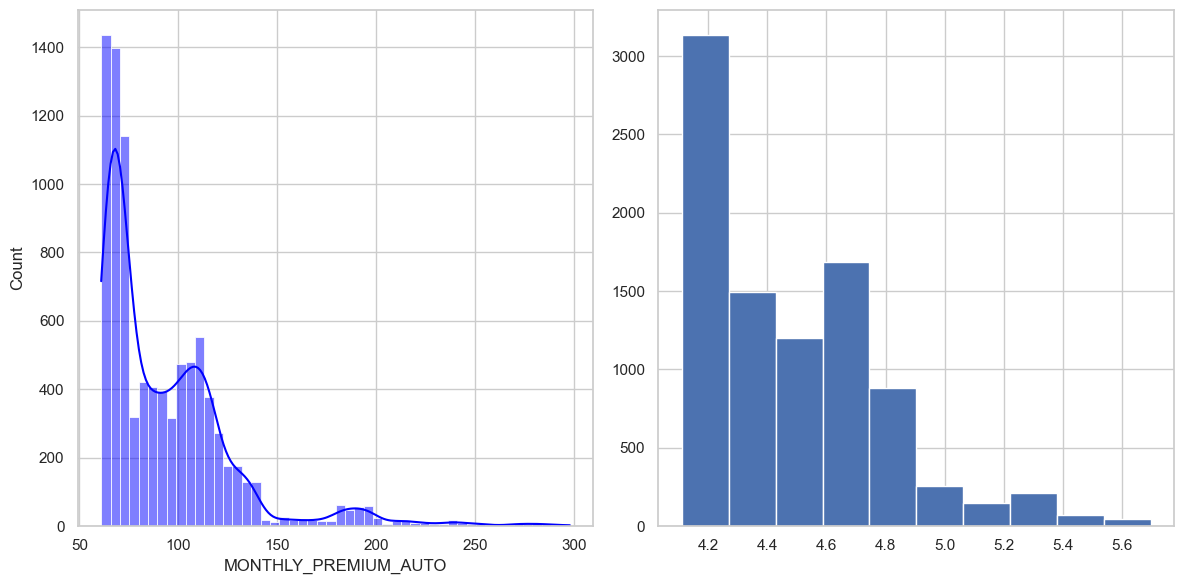

In [66]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num_cont['MONTHLY_PREMIUM_AUTO'], bins = 50, kde = True, color = 'blue')

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(log_transfom_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

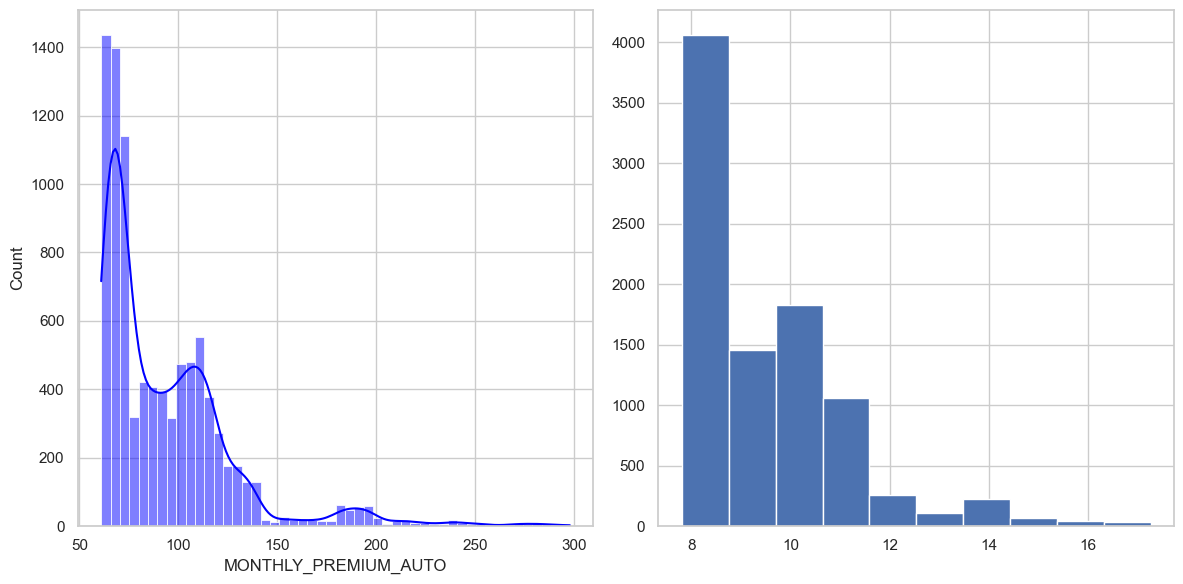

In [67]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num_cont['MONTHLY_PREMIUM_AUTO'], bins = 50, kde = True, color = 'blue')

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(sqrt_transform_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

Comparo los dos métodos para visualizar la distribución de datos mas conveniente

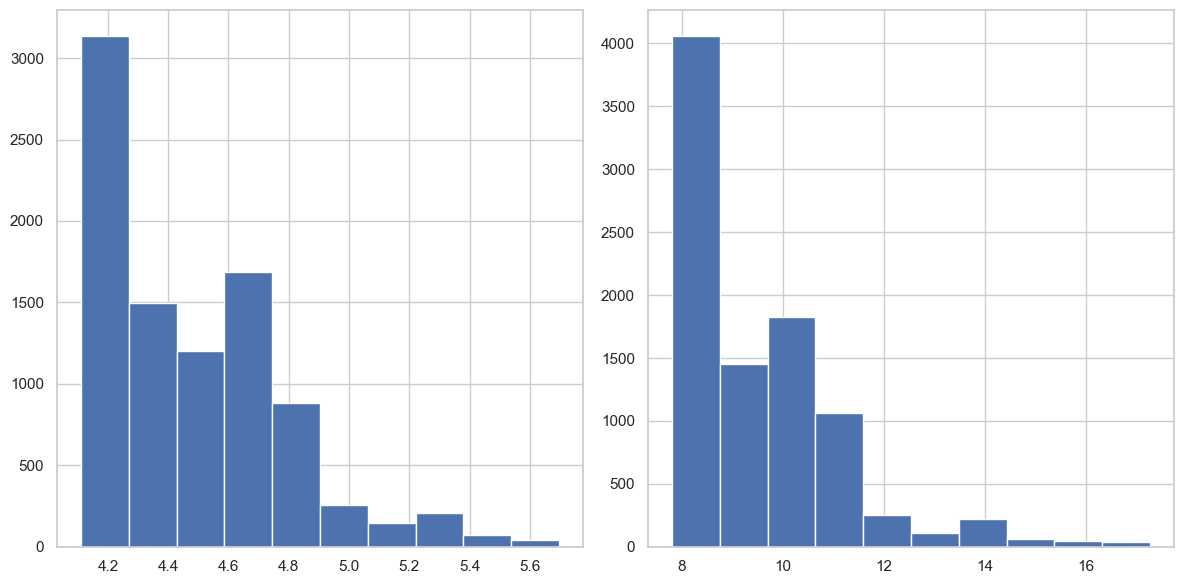

In [68]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Primer gráfico
plt.subplot(1, 2, 1)
pd.Series(map(log_transfom_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO'])).hist()

# Primer gráfico
plt.subplot(1, 2, 2)
pd.Series(map(sqrt_transform_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO'])).hist()

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

Elegiré SQRT TRANSFORM

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_15585/3544256107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cont['MONTHLY_PREMIUM_AUTO'] = list(map(sqrt_transfom_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO']))
/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_15585/3544256107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cont['MONTHLY_PREMIUM_AUTO'] = df_num_cont['MONTHLY_PREMIUM_AUTO'].fillna(np.mean(df_num_cont['MONTHLY_PREMIUM_AUTO']))
/var/folders/23/k5r960

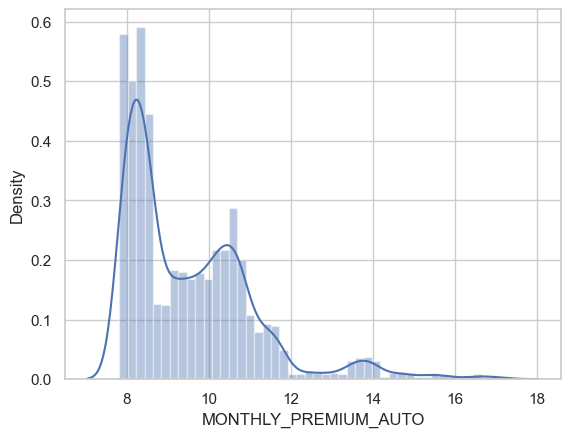

In [69]:
# Use log transformation to replace the values of the column now
df_num_cont['MONTHLY_PREMIUM_AUTO'] = list(map(sqrt_transfom_clean_, df_num_cont['MONTHLY_PREMIUM_AUTO']))
df_num_cont['MONTHLY_PREMIUM_AUTO'] = df_num_cont['MONTHLY_PREMIUM_AUTO'].fillna(np.mean(df_num_cont['MONTHLY_PREMIUM_AUTO']))
sns.distplot(df_num_cont['MONTHLY_PREMIUM_AUTO'])
plt.show()

Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.

In [70]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_num_cont['MONTHLY_PREMIUM_AUTO'],75) - np.percentile(df_num_cont['MONTHLY_PREMIUM_AUTO'],25)
upper_limit = np.percentile(df_num_cont['MONTHLY_PREMIUM_AUTO'],75) + 1.5*iqr
print(upper_limit)

13.731449395423395


In [71]:
df_num_cont_MPA = df_num_cont[df_num_cont['MONTHLY_PREMIUM_AUTO'] > upper_limit]
len(df_num_cont_MPA)  # This checks the number of points that will be removed

293

In [72]:
# Using filters
points = list(filter(lambda x: x < upper_limit, df_num_cont['MONTHLY_PREMIUM_AUTO']))
len(points)

8841

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_15585/3339938762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num_cont['MONTHLY_PREMIUM_AUTO'])


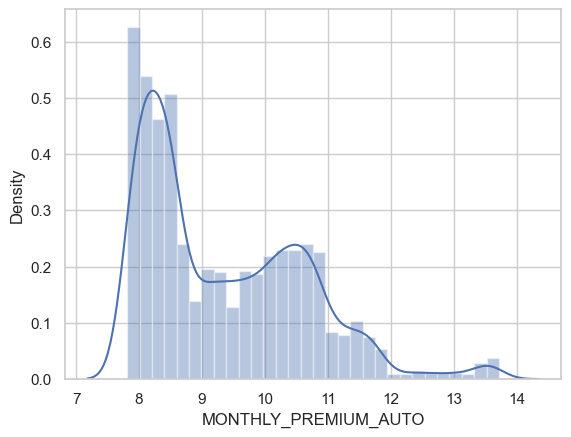

In [73]:
# Removing outliers
df_num_cont = df_num_cont[df_num_cont['MONTHLY_PREMIUM_AUTO'] < upper_limit]
sns.distplot(df_num_cont['MONTHLY_PREMIUM_AUTO'])
plt.show()

10. Check all columns for *NaN* values. Decide what (if anything) you will need to do with them.

In [74]:
# Checking for null values
nulls = pd.DataFrame(df.isna().sum()/len(df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,CUSTOMER,0.0
1,STATE,0.0
22,VEHICLE_CLASS,0.0
21,TOTAL_CLAIM_AMOUNT,0.0
20,SALES_CHANNEL,0.0
19,RENEW_OFFER_TYPE,0.0
18,POLICY,0.0
17,POLICY_TYPE,0.0
16,NUMBER_OF_POLICIES,0.0
15,NUMBER_OF_OPEN_COMPLAINTS,0.0
